<a href="https://colab.research.google.com/github/kajalb23/Localization-of-Signals/blob/main/notebooks/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 482s 676ms/step - accuracy: 0.3247 - loss: 2.1777 - val_accuracy: 0.4386 - val_loss: 1.6225
Epoch 2/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 472s 671ms/step - accuracy: 0.5239 - loss: 1.3258 - val_accuracy: 0.6058 - val_loss: 1.1735
Epoch 3/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 493s 658ms/step - accuracy: 0.6118 - loss: 1.1012 - val_accuracy: 0.6428 - val_loss: 1.1036
Epoch 4/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 469s 666ms/step - accuracy: 0.6600 - loss: 0.9618 - val_accuracy: 0.6532 - val_loss: 1.1080
Epoch 5/5
704/704 ━━━━━━━━━━━━━━━━━━━━ 456s 648ms/step - accuracy: 0.6865 - loss: 0.8946 - val_accuracy: 0.6952 - val_loss: 0.8864
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 70ms/step - accuracy: 0.7014 - loss: 0.8986
Test Accuracy: 0.7024


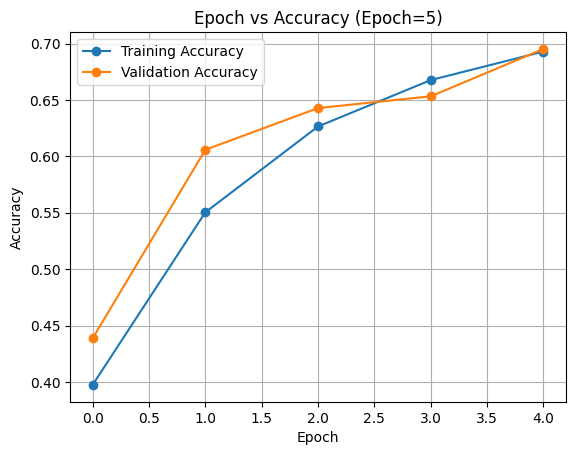

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

num_classes = 10

# Load and normalize data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Convert labels to one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# Split training into train + validation sets
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train)

# Build model
model = models.Sequential([
    layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
batch_size = 64
epochs = 5

history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val, y_val),   # ✅ added this
    verbose=1
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

plt.title('Epoch vs Accuracy (Epoch=5)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.2639 - loss: 2.1942 - val_accuracy: 0.5625 - val_loss: 1.7810
Epoch 2/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.6633 - loss: 1.4828 - val_accuracy: 0.7250 - val_loss: 0.9770
Epoch 3/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.8240 - loss: 0.7203 - val_accuracy: 0.7500 - val_loss: 0.7317
Epoch 4/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.8399 - loss: 0.5132 - val_accuracy: 0.8500 - val_loss: 0.4749
Epoch 5/5
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.8864 - loss: 0.3755 - val_accuracy: 0.8500 - val_loss: 0.5036
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8424 - loss: 0.5626

✅ Test Accuracy: 0.8300


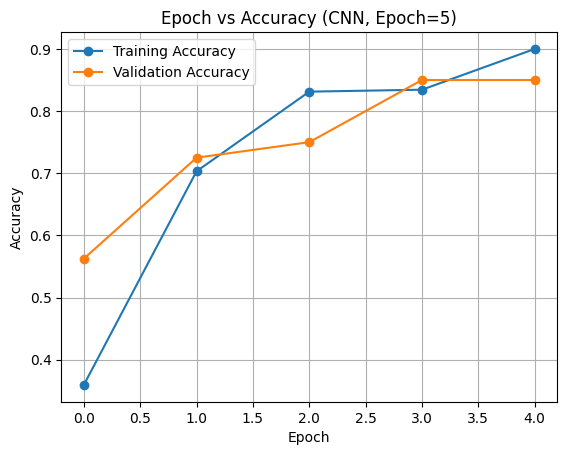

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load full dataset
(x_full, y_full), _ = tf.keras.datasets.mnist.load_data()

# Step 2: Normalize and reshape, then use only first 500 samples
x_subset = x_full[:500].astype('float32') / 255.0
y_subset = y_full[:500]

# Reshape for CNN input: (samples, 28, 28, 1)
x_subset = x_subset.reshape(-1, 28, 28, 1)

# Step 3: Split into train (400) and test (100)
x_train, x_test = x_subset[:400], x_subset[400:]
y_train, y_test = y_subset[:400], y_subset[400:]

# Step 4: Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # Output layer (logits)
])

# Step 5: Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Step 7: Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Step 8: Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Epoch vs Accuracy (CNN, Epoch=5)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.3090 - loss: 2.1432 - val_accuracy: 0.5562 - val_loss: 1.4599
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7183 - loss: 1.0309 - val_accuracy: 0.7688 - val_loss: 0.7450
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.8447 - loss: 0.4980 - val_accuracy: 0.8687 - val_loss: 0.4417
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9228 - loss: 0.3013 - val_accuracy: 0.8500 - val_loss: 0.4476
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9102 - loss: 0.2795 - val_accuracy: 0.8562 - val_loss: 0.3706
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8547 - loss: 0.4953 

✅ Test Accuracy: 0.8400


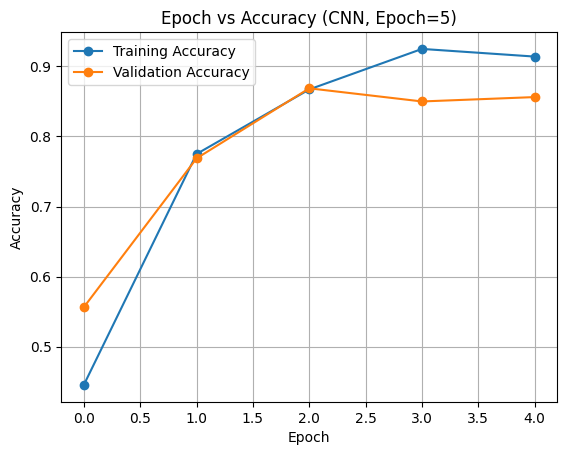

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load full dataset
(x_full, y_full), _ = tf.keras.datasets.mnist.load_data()

# Step 2: Normalize and reshape, then use only first 500 samples
x_subset = x_full[:900].astype('float32') / 255.0
y_subset = y_full[:900]

# Reshape for CNN input: (samples, 28, 28, 1)
x_subset = x_subset.reshape(-1, 28, 28, 1)

# Step 3: Split into train (400) and test (100)
x_train, x_test = x_subset[:800], x_subset[800:]
y_train, y_test = y_subset[:800], y_subset[800:]

# Step 4: Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # Output layer (logits)
])

# Step 5: Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Step 7: Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Step 8: Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Epoch vs Accuracy (CNN, Epoch=5)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - accuracy: 0.3119 - loss: 2.1566 - val_accuracy: 0.6389 - val_loss: 1.3312
Epoch 2/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7837 - loss: 0.9169 - val_accuracy: 0.8111 - val_loss: 0.5787
Epoch 3/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.8905 - loss: 0.4074 - val_accuracy: 0.8611 - val_loss: 0.4715
Epoch 4/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.9428 - loss: 0.2186 - val_accuracy: 0.8722 - val_loss: 0.4431
Epoch 5/5
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9396 - loss: 0.2013 - val_accuracy: 0.9056 - val_loss: 0.3642
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9262 - loss: 0.3801

✅ Test Accuracy: 0.9300


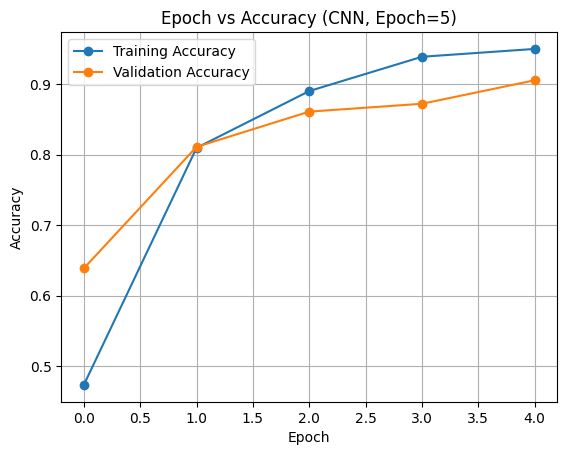

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load full dataset
(x_full, y_full), _ = tf.keras.datasets.mnist.load_data()

# Step 2: Normalize and reshape, then use only first 500 samples
x_subset = x_full[:1000].astype('float32') / 255.0
y_subset = y_full[:1000]

# Reshape for CNN input: (samples, 28, 28, 1)
x_subset = x_subset.reshape(-1, 28, 28, 1)

# Step 3: Split into train (400) and test (100)
x_train, x_test = x_subset[:900], x_subset[900:]
y_train, y_test = y_subset[:900], y_subset[900:]

# Step 4: Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # Output layer (logits)
])

# Step 5: Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Step 7: Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Step 8: Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Epoch vs Accuracy (CNN, Epoch=5)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.2967 - loss: 2.0112 - val_accuracy: 0.6773 - val_loss: 1.0301
Epoch 2/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8103 - loss: 0.7043 - val_accuracy: 0.8273 - val_loss: 0.5878
Epoch 3/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9109 - loss: 0.3139 - val_accuracy: 0.8364 - val_loss: 0.5103
Epoch 4/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.9215 - loss: 0.2664 - val_accuracy: 0.8636 - val_loss: 0.4438
Epoch 5/5
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9613 - loss: 0.1655 - val_accuracy: 0.9000 - val_loss: 0.3861
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9076 - loss: 0.3608

✅ Test Accuracy: 0.9200


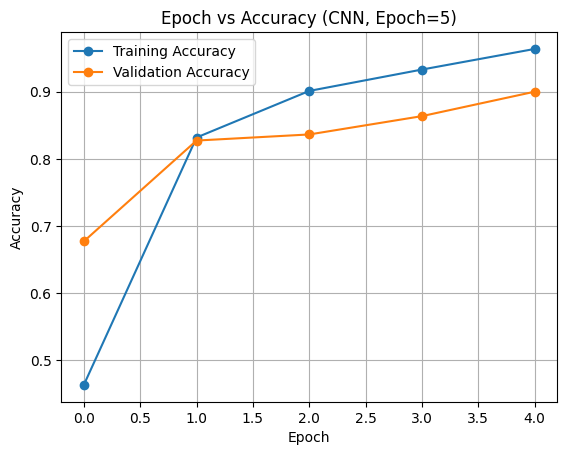

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Step 1: Load full dataset
(x_full, y_full), _ = tf.keras.datasets.mnist.load_data()

# Step 2: Normalize and reshape, then use only first 500 samples
x_subset = x_full[:1200].astype('float32') / 255.0
y_subset = y_full[:1200]

# Reshape for CNN input: (samples, 28, 28, 1)
x_subset = x_subset.reshape(-1, 28, 28, 1)

# Step 3: Split into train (400) and test (100)
x_train, x_test = x_subset[:1100], x_subset[1100:]
y_train, y_test = y_subset[:1100], y_subset[1100:]

# Step 4: Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # Output layer (logits)
])

# Step 5: Compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Step 6: Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# Step 7: Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# Step 8: Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Epoch vs Accuracy (CNN, Epoch=5)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.8811 - loss: 0.3925 - val_accuracy: 0.9803 - val_loss: 0.0693
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.9818 - loss: 0.0593 - val_accuracy: 0.9860 - val_loss: 0.0499
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9886 - loss: 0.0365 - val_accuracy: 0.9855 - val_loss: 0.0482
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9910 - loss: 0.0271 - val_accuracy: 0.9885 - val_loss: 0.0405
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9950 - loss: 0.0170 - val_accuracy: 0.9898 - val_loss: 0.0396
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9856 - loss: 0.0414

✅ Test Accuracy: 0.9886


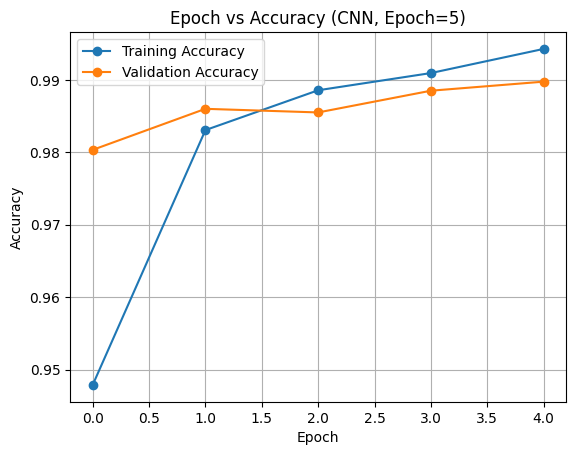

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# 1. Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 2. Normalize input data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 3. Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# 4. Define CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)  # logits for 10 classes
])

# 5. Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 6. Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.2)

# 7. Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

# 8. Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Epoch vs Accuracy (CNN, Epoch=5)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

